<a href="https://colab.research.google.com/github/Emio-eng/Models-IA/blob/main/Regress%C3%A3o_Logistica%2C_arvore_de_decis%C3%A3o_e_Kmeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Regressão Logistíca

In [ ]:
##importar os pacotes necessários
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

##configurar o notebook
sns.set_style()

#importar o dataset

df= pd.read_csv("http://dl.dropboxusercontent.com/s/6d91j46mkcdj4qv/heart-disease-clean.csv?dl=1")

#ver o tamanho  do dataframe e os 5 primeiros registros

print("Tamanho do DF:{}\n".format(df.shape))

df.head()


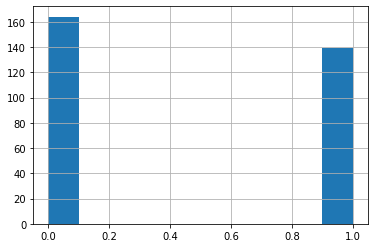

In [ ]:
df['num'].hist()

##Construção do modelo

In [ ]:
#importar skcit-learn para criar o modelo
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [ ]:
#1. escolher e importar o modelo
from sklearn.linear_model import LogisticRegression

#2. Instanciar e escolher os HyperParameters
model = LogisticRegression()

#3. Separar os dados entre feature matrix e target vector
X = df.drop('num', axis = 1)
y = df['num']

#3.1 Dividir o dataset em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X,y)

#3.2 Padronização dos dados de treino
scaler =  StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)

#4. Fazer treinamento (fit) do modelo
model.fit(X_train, y_train)

#5. Fazer previsões em cima de novos dados
X_test = scaler.transform(X_test)
y_pred = model.predict(X_test)


In [ ]:
#imprimir o relatório de classificação
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.82      0.66      0.73        47
           1       0.58      0.76      0.66        29

    accuracy                           0.70        76
   macro avg       0.70      0.71      0.69        76
weighted avg       0.73      0.70      0.70        76



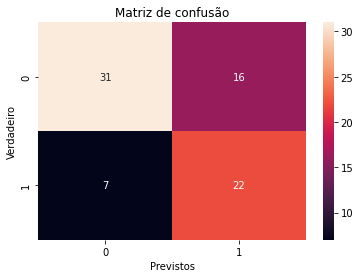

In [ ]:
#plotando a matriz de confusão
fig, ax = plt.subplots()
sns.heatmap(confusion_matrix(y_test, y_pred), annot = True, ax=ax)

ax.set_title("Matriz de confusão")
ax.set_ylabel("Verdadeiro")
ax.set_xlabel("Previstos")

plt.show()

In [ ]:
#probabilidade em cima do dataset  de teste
y_prob = model.predict_proba(X_test)

print("y_pred:\n",y_pred[0:5])
print("\ny_proba: \n", y_prob[0:5])


y_pred:
 [0 1 0 0 0]

y_proba: 
 [[0.91936344 0.08063656]
 [0.3446909  0.6553091 ]
 [0.65599136 0.34400864]
 [0.97967275 0.02032725]
 [0.61058039 0.38941961]]


##Árvore de decisão

In [ ]:
##importar os pacotes necessários
from sklearn.metrics import accuracy_score

df.head(10)

##Desenvolvendo modelo de árvore de decisão

In [ ]:
from sklearn.tree import DecisionTreeClassifier

model1 = DecisionTreeClassifier(max_depth=4,criterion="entropy")

X1 = df.drop('num', axis=1)
y1 = df['num']

X_train1, X_test1, y_train1, y_test1 = train_test_split(X1,y1)

model1.fit(X_train1, y_train1)

y_pred1 = model1.predict(X_test1)

#classification
print(classification_report(y_test1,y_pred1))

              precision    recall  f1-score   support

           0       0.82      0.80      0.81        45
           1       0.72      0.74      0.73        31

    accuracy                           0.78        76
   macro avg       0.77      0.77      0.77        76
weighted avg       0.78      0.78      0.78        76



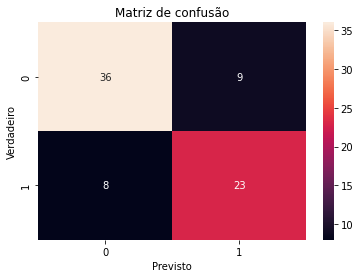

In [ ]:
#matriz de confusão
fig, ax=plt.subplots()
sns.heatmap(confusion_matrix(y_test1, y_pred1), annot=True, ax=ax)

ax.set_title("Matriz de confusão")
ax.set_ylabel("Verdadeiro")
ax.set_xlabel("Previsto")

plt.show()

In [ ]:
#ver a perfomance do algoritmo
print("\nAccuracy Score:")
print(accuracy_score(y_test1, y_pred1))


Accuracy Score:
0.7763157894736842


In [ ]:
#importar as bibliotecas

from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus

#criar DOT

dot = export_graphviz(model1, filled=True, rounded=True,
                      feature_names=X1.columns, class_names=['0','1'])

#plotar
graph = pydotplus.graph_from_dot_data(dot)
Image(graph.create_png())


##Clustering

In [ ]:
#importar dataset
df1 = pd.read_csv("https://raw.githubusercontent.com/carlosfab/dsnp2/master/datasets/clustering.csv")

#ver as primeiras entradas e o tamanho do dataframe
print("Tamanho do df: {}\n".format(df1.shape))

df1.head()

##Construção de modelo

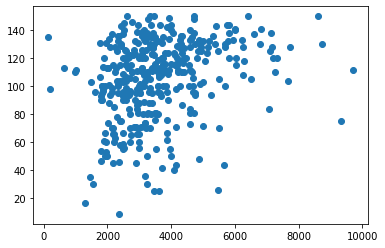

In [ ]:
from sklearn.cluster import KMeans

model2 = KMeans(n_clusters=2)
model3 = KMeans(n_clusters=4)

X2=df1[['ApplicantIncome','LoanAmount']]

model2.fit(X2)
model3.fit(X2)

y_pred2 = model2.predict(X2)
y_pred3 = model3.predict(X2)

plt.scatter('ApplicantIncome','LoanAmount', data=df1)
plt.show()

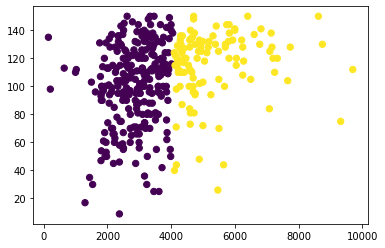

In [ ]:
plt.scatter('ApplicantIncome','LoanAmount', data=df1, c=y_pred2, s=40)


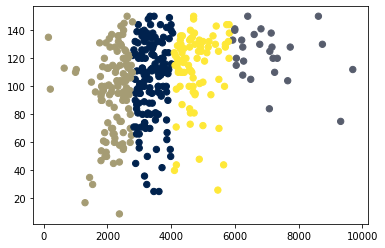

In [ ]:
plt.scatter('ApplicantIncome','LoanAmount', data=df1, c=y_pred3, s=40, cmap='cividis')


In [ ]:
plt.scatter('ApplicantIncome','LoanAmount', data=df1, c=y_pred3, s=40, cmap='cividis')